In [ ]:
Chapter 6
topic 6.1
The first step of almost any data project is to read the data, 
check for errors and special cases, and prepare data for analysis.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')

# Select column birthwgt_oz1: ounces
ounces=nsfg['birthwgt_oz1']

In [ ]:
# Print the first 5 elements of ounces
print(ounces.head())

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


In [ ]:
# Display the number of rows and columns
nsfg.shape

(9358, 10)

In [ ]:
# Display the names of the columns
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [ ]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


In [ ]:
# Select the columns and divide by 100
agecon = nsfg['agecon']/100
agepreg = nsfg['agepreg']/100

In [ ]:

# Compute the difference
preg_length = agepreg-agecon

In [ ]:

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


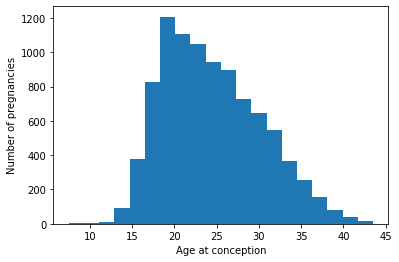

In [ ]:
# Plot the histogram
plt.hist(agecon, bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

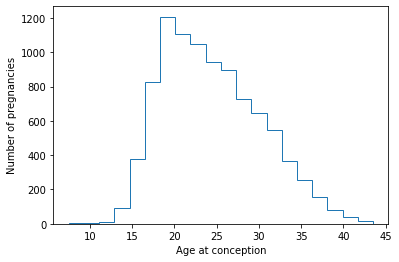

In [ ]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

In [ ]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [ ]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth']>=37

full_term

0        True
1       False
2       False
3       False
4        True
        ...  
9353    False
9354     True
9355    False
9356     True
9357     True
Name: prglngth, Length: 9358, dtype: bool

In [ ]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv']==1

single

0        True
1        True
2        True
3       False
4        True
        ...  
9353     True
9354     True
9355     True
9356     True
9357     True
Name: nbrnaliv, Length: 9358, dtype: bool

In [ ]:
Chapter 6
topic 6.2
you'll learn how to represent distributions using 
Probability distributions.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

gss = pd.read_hdf('gss.hdf5', 'gss')

# Select head
gss.head()
gss.columns

Index(['year', 'age', 'cohort', 'sex', 'race', 'educ', 'realinc', 'gunlaw',
       'grass', 'wtssall'],
      dtype='object')

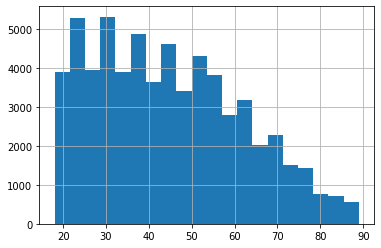

In [ ]:
gss['age'].hist(bins=20)

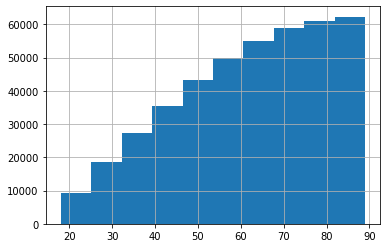

In [ ]:
 gss['age'].hist(density=False, weights=None, cumulative=True, bottom=None, histtype='bar')

In [ ]:
# Select columns
columns = ['age', 'year', 'educ']
subset = gss[columns]

# Compute the correlation matrix
print(subset.corr())

           age      year      educ
age   1.000000  0.065482 -0.153742
year  0.065482  1.000000  0.214065
educ -0.153742  0.214065  1.000000


In [ ]:
Age=gss[['age']]
Year=gss[['year']]

In [ ]:
In statistics, kernel density estimation (KDE) is a non-parametric way 
to estimate the probability density function (PDF) of a random variable. 
This function uses Gaussian kernels and includes automatic bandwidth determination.
gaussian == normal distribution

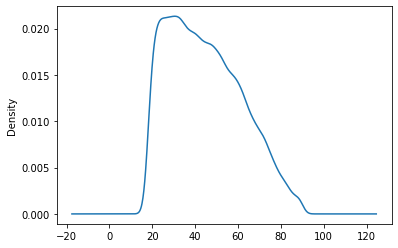

In [ ]:
Age= gss['age']
Age.plot.kde()
plt.show()

In [ ]:
The method used to calculate the estimator bandwidth. This can be ‘scott’,
 ‘silverman’, a scalar constant or a callable. If None (default), ‘scott’ is used

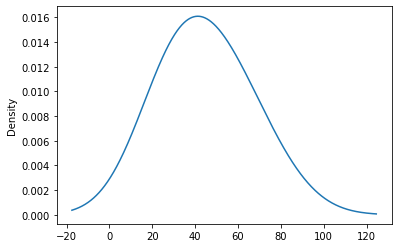

In [ ]:
Age= gss['age']
Age.plot.kde(bw_method=1)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


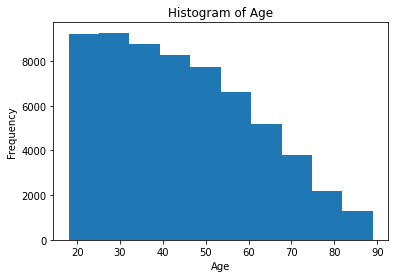

In [ ]:
plt.hist(Age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [ ]:
Year= gss['year']

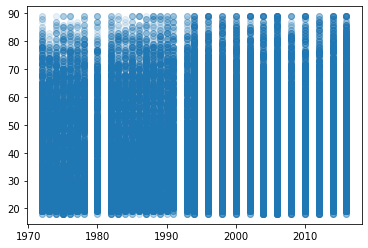

In [ ]:
# Make a scatter plot
plt.plot(Year, Age, 'o', alpha=0.1)
plt.show()

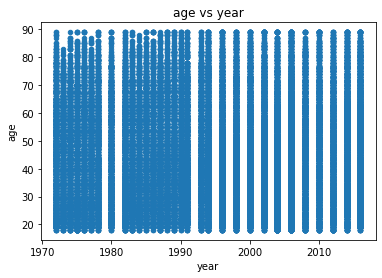

In [ ]:
gss.plot(x='year', y='age', kind='scatter', title='age vs year')
# Show the plot
plt.show()

In [ ]:
Chapter 6
topic 6.3
Explore multivariate relationships using multiple regression to 
describe non-linear relationships and logistic regression to explain 
and predict binary variables.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

brfss = pd.read_hdf('brfss.hdf5', 'brfss')

# Select head
brfss.head()
brfss.columns

Index(['SEX', 'HTM4', 'WTKG3', 'INCOME2', '_LLCPWT', '_AGEG5YR', '_VEGESU1',
       '_HTMG10', 'AGE'],
      dtype='object')

In [3]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs, ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data=brfss).fit()
print(results.params)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332)
Intercept    1.528779
INCOME2      0.069880
dtype: float64


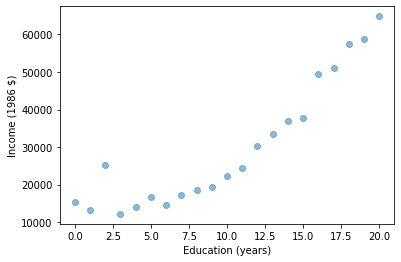

In [15]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

In [9]:
gss.columns

Index(['year', 'age', 'cohort', 'sex', 'race', 'educ', 'realinc', 'gunlaw',
       'grass', 'wtssall', 'educ2'],
      dtype='object')

In [16]:
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss['educ']**2
gss['age2'] = gss['age']**2
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


In [17]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0, 20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


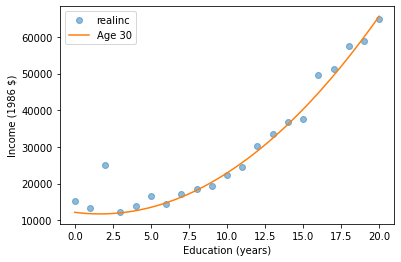

In [18]:
# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha=0.5, label='realinc')

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

In [19]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

In [ ]:
https://www.statsmodels.org/dev/example_formulas.html